### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/FeatureImportance">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Mount with google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
!git clone 'http://github.com/Nak007/FeatureImportance.git'

In [1]:
import pandas as pd, numpy as np, sys
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.4f}'.format

# scikit-learn library
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.datasets import make_classification

sys.path.append('/content/FeatureImportance')
from FeatureImportance import *

### <font color="green" size=5> Make classification data </font>

Generate a random n-class classification problem. [Reference](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

In [2]:
X, y = make_classification(n_samples     = 10000, 
                           n_features    = 20, 
                           n_informative = 10, 
                           n_redundant   = 10, 
                           random_state  = 0, 
                           shuffle       = True, 
                           n_classes     = 2, 
                           weights       = [0.7,0.3])

X = pd.DataFrame(X, columns=["feature_" + str(n).zfill(2) 
                             for n in range(1,X.shape[1]+1)]) 

In [3]:
kwargs = {"random_state": 0, 
          "n_estimators": 50, 
          "n_jobs"      : -1, 
          "max_depth"   : 7, 
          "max_features": "sqrt"}
clf = rf(**kwargs).fit(X, y)

**Importance Values**
- sklearn (average decrease in impurity or Information Gain)
- Directional Feature Contributions (DFC)
- Permute variable (Permutation Importance)
- Drop variable (Drop-Column Importance)

In [22]:
model = FeatureImportance().fit(clf, X, y)

In [23]:
model.info.head(10)

,gain_score,dfc_score,permute_score,drop_score,mean_score
features,,,,,
feature_02,0.1037,0.0965,0.1675,0.1794,0.1672
feature_13,0.0704,0.0954,0.1218,0.1300,0.1276
feature_08,0.1081,0.1220,0.1126,0.0083,0.1072
feature_01,0.0660,0.0864,0.0840,0.0971,0.1019
feature_20,0.0703,0.0810,0.0596,0.0898,0.0919
feature_17,0.0543,0.0473,0.0607,0.0219,0.0562
feature_07,0.0540,0.0583,0.0453,0.0143,0.0525
feature_10,0.0437,0.0304,0.0406,0.0433,0.0483
feature_04,0.0487,0.0426,0.0481,0.0134,0.0467


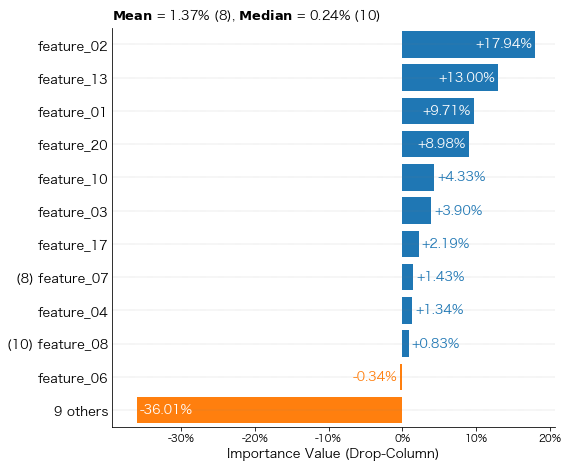

In [36]:
ax = model.plotting(max_display=12, column="drop_score")